In [1]:
# !pip install seaborn==0.9.0 upgrade seaborn

**Import Required libraries**

In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML

import warnings

In [63]:
%matplotlib inline
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

Check directories where data is.
This project uses data from Kagge: https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities

In [64]:
import os
for dirname, _, filenames in os.walk('datasets/Daily Cities Temperature/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

datasets/Daily Cities Temperature/city_temperature.csv
datasets/Daily Cities Temperature/country_temperature_racing_bar_chart.csv
datasets/Daily Cities Temperature/region_temperature_racing_bar_chart.csv


Load Data to Pandas DataFrame

In [65]:
df=pd.read_csv('datasets/Daily Cities Temperature/city_temperature.csv')

# Inspect Data

Check size of the data

In [66]:
df.shape

(2906327, 8)

Get the number of rows/records only

In [67]:
df.shape[0]

2906327

Get the number of columns only

In [68]:
df.shape[1]

8

Show column names

In [69]:
df.columns

Index(['Region', 'Country', 'State', 'City', 'Month', 'Day', 'Year',
       'AvgTemperature'],
      dtype='object')

Show first 5 rows/records

In [70]:
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


Show last 5 rows/records

In [71]:
df.tail()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8
2906326,North America,US,Additional Territories,San Juan Puerto Rico,7,31,2013,83.6


Check data types

In [72]:
df.dtypes

Region             object
Country            object
State              object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object

Convert Data Types for Day, Month & Year to String

In [73]:
df['Day_STR']=df['Day'].astype(str)
df['Month_STR']=df['Month'].astype(str)
df['Year_STR']=df['Year'].astype(str)

In [74]:
df.dtypes

Region             object
Country            object
State              object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
Day_STR            object
Month_STR          object
Year_STR           object
dtype: object

Show more information including memory

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 11 columns):
Region            object
Country           object
State             object
City              object
Month             int64
Day               int64
Year              int64
AvgTemperature    float64
Day_STR           object
Month_STR         object
Year_STR          object
dtypes: float64(1), int64(3), object(7)
memory usage: 243.9+ MB


check for missing data

In [76]:
df.isna().sum()

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
Day_STR                 0
Month_STR               0
Year_STR                0
dtype: int64

Check for Outliers using boxplot

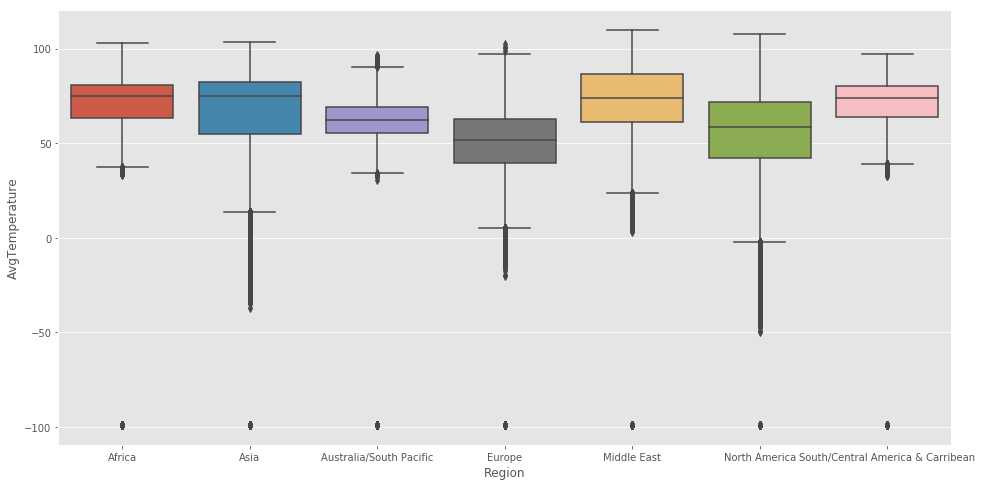

In [17]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x='Region',y='AvgTemperature',data=df,ax=ax)

Remove records with -99.0 as average Temperature

In [18]:
# Check the number of records
df[df['AvgTemperature']==-99.0].count()

Region            79672
Country           79672
State              4782
City              79672
Month             79672
Day               79672
Year              79672
AvgTemperature    79672
Day_STR           79672
Month_STR         79672
Year_STR          79672
dtype: int64

In [19]:
# Remove these records
df=df.drop(df[df['AvgTemperature']==-99.0].index)

In [20]:
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Day_STR,Month_STR,Year_STR
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2,1,1,1995
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4,2,1,1995
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8,3,1,1995
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4,4,1,1995
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9,5,1,1995


Add Date Column

In [21]:
df['Date']=df['Day'].astype(str)+'/'+df['Month'].astype(str)+'/'+df['Year'].astype(str)

In [22]:
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Day_STR,Month_STR,Year_STR,Date
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2,1,1,1995,1/1/1995
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4,2,1,1995,2/1/1995
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8,3,1,1995,3/1/1995
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4,4,1,1995,4/1/1995
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9,5,1,1995,5/1/1995


Convert created date to date formart

In [23]:
df['Date']=pd.to_datetime(df['Date'])

In [24]:
df.dtypes

Region                    object
Country                   object
State                     object
City                      object
Month                      int64
Day                        int64
Year                       int64
AvgTemperature           float64
Day_STR                   object
Month_STR                 object
Year_STR                  object
Date              datetime64[ns]
dtype: object

In [25]:
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Day_STR,Month_STR,Year_STR,Date
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2,1,1,1995,1995-01-01
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4,2,1,1995,1995-02-01
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8,3,1,1995,1995-03-01
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4,4,1,1995,1995-04-01
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9,5,1,1995,1995-05-01


Recheck out data size

In [26]:
df.shape

(2826655, 12)

Pivot Region & Year data with average temperature for flourish racing bar chart

In [27]:
pivoted_region_year_df=pd.pivot_table(df[['Region','AvgTemperature','Year']], 
                          values='AvgTemperature', index=['Region'],
                          columns=['Year'], aggfunc=np.mean)

In [28]:
pivoted_region_year_df.head()

Year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Region,,,,,,,,,,,,,,,,,,,,,
Africa,73.890036,73.554702,73.441142,73.748808,73.894222,73.417745,74.296694,74.288789,74.783506,74.639458,...,74.377066,73.633465,74.330175,74.696516,74.868820,75.283257,74.945005,74.680202,75.092628,75.193292
Asia,67.262985,67.869678,68.348367,69.062920,68.029178,67.718861,67.737265,68.059322,67.912223,68.314479,...,67.650851,67.238679,67.838789,67.806272,68.667072,68.854753,68.457670,68.455211,68.667209,61.867929
Australia/South Pacific,61.199497,60.956974,61.577032,62.031349,62.095055,61.857950,61.823546,62.172245,61.875161,61.856512,...,62.133881,61.739041,62.891724,62.848810,62.512729,62.987856,62.966514,62.816667,63.323852,68.114303
Europe,51.539997,50.138435,51.440223,51.866761,52.250955,53.021257,51.981836,52.511618,52.207325,51.790844,...,52.315738,51.441408,51.214666,52.765144,52.615565,52.009338,52.051640,52.851073,52.863750,45.207751
Middle East,71.612651,72.497772,71.081457,73.706373,73.707732,72.494471,74.155654,73.635791,73.674220,73.469972,...,73.655869,74.301970,74.315510,74.873449,75.466067,75.117190,75.022046,76.230921,74.932755,64.080575


In [29]:
pivoted_region_year_df.to_csv('datasets/Daily Cities Temperature/region_temperature_racing_bar_chart.csv')

Pivot Country & Year data with average temperature for flourish racing bar chart

In [30]:
pivoted_Country_Year_df=pd.pivot_table(df[['Country','AvgTemperature','Year']], 
                          values='AvgTemperature', index=['Country'],
                          columns=['Year'], aggfunc=np.mean)

In [31]:
pivoted_Country_Year_df.head()

Year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,71.934783,61.612500,63.116961,63.176945,61.235600,63.301266,63.654848,61.523836,...,59.918630,60.319726,60.413151,60.653022,60.964286,60.732597,60.384658,62.096111,61.668056,51.159701
Algeria,64.410468,63.530220,64.926301,63.619668,64.923626,64.182787,64.669863,64.135457,65.493407,64.087432,...,64.960822,64.290437,63.704658,65.646978,64.943681,65.311878,64.995890,64.419444,64.992758,58.034328
Argentina,61.701370,62.710109,63.143836,61.761111,61.835714,62.396164,63.339835,63.006667,61.924242,62.625956,...,63.235342,63.725137,62.880548,63.613699,63.825549,62.193939,64.137808,63.474722,63.071309,69.984328
Australia,61.501753,61.255799,62.151781,62.200846,62.472363,62.250219,62.229066,62.690333,62.382681,62.518470,...,62.538849,62.255683,63.382656,63.483956,63.063626,63.408223,63.455647,63.264100,63.875780,68.716418
Austria,50.251233,47.676776,49.682740,51.337950,50.955220,52.759563,50.823014,51.868975,51.495068,50.603005,...,51.279452,51.911475,51.426301,53.353022,53.472802,52.108264,52.351507,53.788950,53.912222,44.924627


In [32]:
pivoted_Country_Year_df.to_csv('datasets/Daily Cities Temperature/country_temperature_racing_bar_chart.csv')

# Explore Data

How many unique Countries do we have in our data

In [33]:
df['Country'].nunique()

125

How many unique Coutries per Region are we having

In [34]:
df.groupby(['Region'])['Country'].nunique()

Region
Africa                               28
Asia                                 25
Australia/South Pacific               2
Europe                               34
Middle East                          11
North America                         3
South/Central America & Carribean    22
Name: Country, dtype: int64

In [35]:
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Day_STR,Month_STR,Year_STR,Date
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2,1,1,1995,1995-01-01
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4,2,1,1995,1995-02-01
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8,3,1,1995,1995-03-01
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4,4,1,1995,1995-04-01
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9,5,1,1995,1995-05-01


Get average temperature per Region throughout the years

In [36]:
df.groupby(['Region'])['AvgTemperature'].mean()

Region
Africa                               74.402602
Asia                                 68.109723
Australia/South Pacific              62.303693
Europe                               51.947171
Middle East                          73.840683
North America                        56.150198
South/Central America & Carribean    72.202024
Name: AvgTemperature, dtype: float64

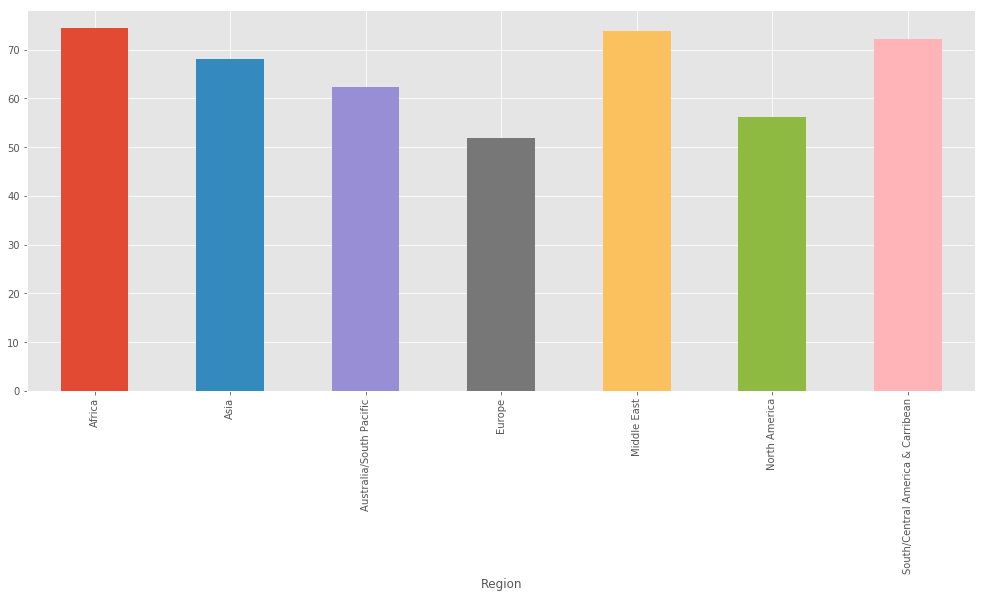

In [37]:
df.groupby(['Region'])['AvgTemperature'].mean().plot(kind='bar',figsize=(17,7))

Daily Average Temperature Per Region Per Year

In [38]:
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/2738038" 
data-url="https://flo.uri.sh/visualisation/2738038/embed"><script src="https://public.flourish.studio/resources/embed.js">
</script></div>''')

Show top 10 Countries with highest average temperature

In [39]:
df.groupby(['Country'])['AvgTemperature'].mean().sort_values(ascending=False).head(10)

Country
Haiti                   85.348418
Nigeria                 83.985160
Thailand                83.918827
Indonesia               83.366229
Guyana                  83.345880
United Arab Emirates    83.241435
Oman                    82.966070
Qatar                   82.962217
Philippines             82.364495
Guinea-Bissau           82.335534
Name: AvgTemperature, dtype: float64

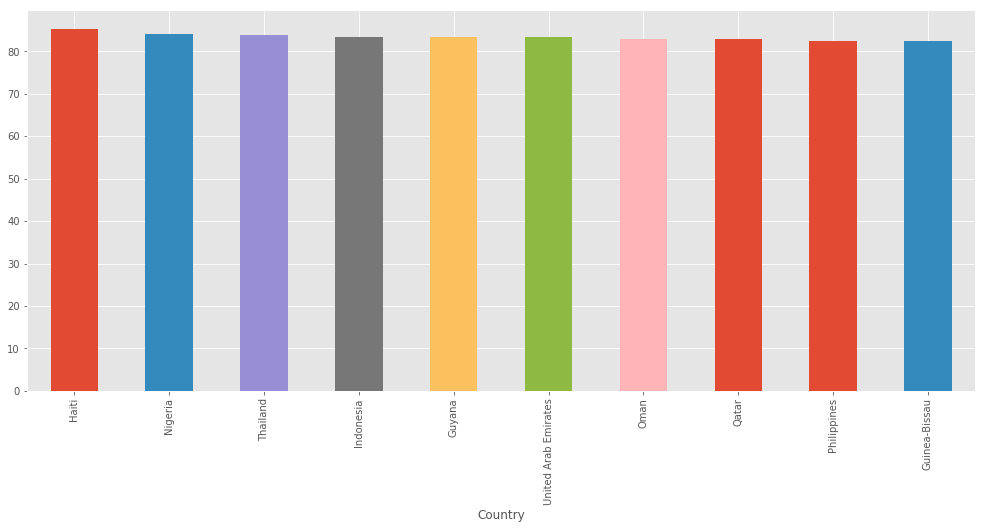

In [40]:
df.groupby(['Country'])['AvgTemperature'].mean().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(17,7))

Average Daily Temperature Per Country Per Year

In [41]:
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/2738445" 
data-url="https://flo.uri.sh/visualisation/2738445/embed"><script src="https://public.flourish.studio/resources/embed.js">
</script></div>''')

Show top 10 Countries with maximum temperature Per Region

In [42]:
df.groupby(['Region','Country'])['AvgTemperature'].max().sort_values(ascending=False).head(10)

Region         Country             
Middle East    Kuwait                  110.0
               Qatar                   108.5
               Saudi Arabia            107.8
North America  US                      107.7
Middle East    United Arab Emirates    107.5
               Oman                    105.9
Asia           India                   103.7
North America  Mexico                  103.4
Middle East    Bahrain                 103.3
Africa         Nigeria                 102.8
Name: AvgTemperature, dtype: float64

Show top 10 Countries with minimum temperature

In [43]:
df.groupby(['Country'])['AvgTemperature'].min().sort_values(ascending=False).head(10)

Country
Barbados       74.2
Malaysia       73.4
Panama         73.4
Singapore      73.3
Suriname       71.6
Venezuela      71.5
Haiti          71.4
Indonesia      71.3
Philippines    70.9
Sri Lanka      70.3
Name: AvgTemperature, dtype: float64

Show minimum temperature in Kenya

In [44]:
df[df['Country']=='Kenya'].groupby('Country')['AvgTemperature'].min()

Country
Kenya    51.8
Name: AvgTemperature, dtype: float64

Show maximum temperature in Kenya

In [45]:
df[df['Country']=='Kenya'].groupby('Country')['AvgTemperature'].max()

Country
Kenya    82.4
Name: AvgTemperature, dtype: float64

Show the average AvgTemperature temperature in Kenya

In [46]:
df[df['Country']=='Kenya'].groupby('Country')['AvgTemperature'].mean()

Country
Kenya    67.490947
Name: AvgTemperature, dtype: float64

Show the top 5 Cities with the highest temperature in the dataset

In [47]:
df.groupby('City')['AvgTemperature'].max().sort_values(ascending=False).head(10)

City
Kuwait       110.0
Doha         108.5
Dhahran      107.8
Phoenix      107.7
Dubai        107.5
Yuma         107.5
Abu Dhabi    107.3
Las Vegas    107.0
Muscat       105.9
Riyadh       105.0
Name: AvgTemperature, dtype: float64

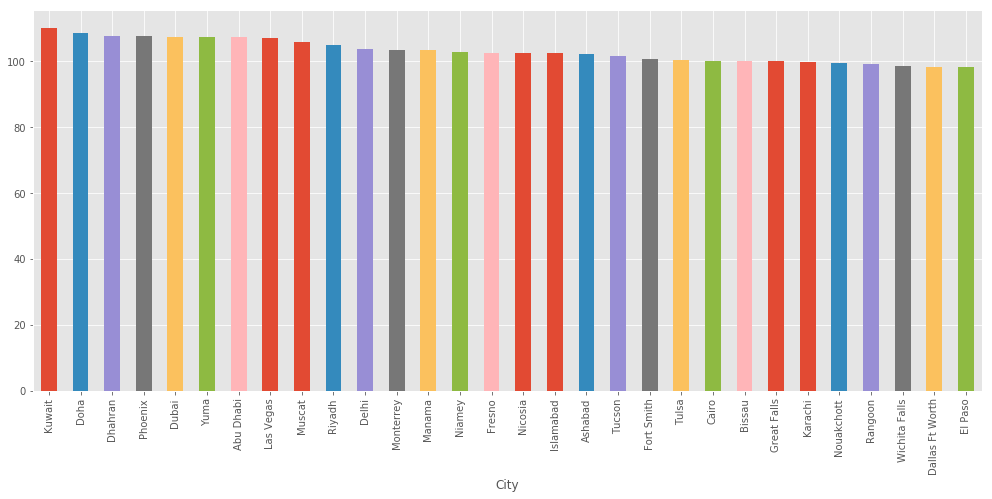

In [48]:
df.groupby('City')['AvgTemperature'].max().sort_values(ascending=False).head(30).plot(kind='bar',figsize=(17,7))

Show top 5 hottest days in Asia

In [49]:
df[df['Region']=='Asia'].groupby(['Country','Year','Month','Day'])['AvgTemperature'].max().sort_values(ascending=False).head()

Country  Year  Month  Day
India    1998  5      28     103.7
         2017  6      4      103.6
                      5      103.3
         1998  5      29     102.9
         1995  6      15     102.9
Name: AvgTemperature, dtype: float64

Show temperature trend on a year & Month basis

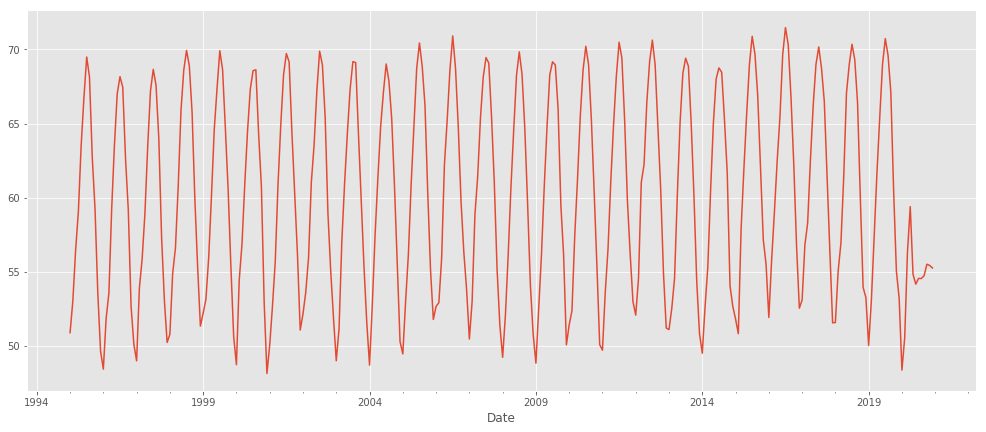

In [50]:
df.groupby(df['Date'].dt.to_period('M'))['AvgTemperature'].mean().plot(kind='line',figsize=(17,7))

# Statistical Functions and Analysis

Show Highest temperature

In [51]:
df['AvgTemperature'].max()

110.0

Show lowest temperature

In [52]:
df['AvgTemperature'].min()

-50.0

Show Average tempetarure

In [53]:
df['AvgTemperature'].mean()

60.37388411391197

Show standard deviation for the AvgTemperature

In [54]:
df['AvgTemperature'].std()

19.097439793206092

Show Variance in AvgTemperature

In [55]:
df['AvgTemperature'].var()

364.7122066551316

Show Skew

In [56]:
df['AvgTemperature'].skew()

-0.6468881698101501

Show Kurtosis

In [57]:
df['AvgTemperature'].kurt()

0.09066671745728794

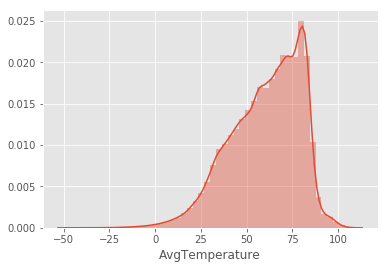

In [58]:
sns.distplot(df['AvgTemperature'])

Show Statistical Summary

In [59]:
df.describe(include='all')

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Day_STR,Month_STR,Year_STR,Date
count,2826655,2826655,1450555,2826655,2.826655e+06,2.826655e+06,2.826655e+06,2.826655e+06,2826655,2826655,2826655,2826655
unique,7,125,52,321,NaN,NaN,NaN,NaN,31,12,26,9260
top,North America,US,Texas,Washington DC,NaN,NaN,NaN,NaN,8,3,2001,2001-02-21 00:00:00
freq,1548160,1450555,129420,18498,NaN,NaN,NaN,NaN,93282,246302,115277,324
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995-01-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-05 00:00:00
mean,NaN,NaN,NaN,NaN,6.464649e+00,1.570960e+01,2.007028e+03,6.037388e+01,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,3.455714e+00,8.800018e+00,7.268831e+00,1.909744e+01,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00,1.995000e+03,-5.000000e+01,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,3.000000e+00,8.000000e+00,2.001000e+03,4.740000e+01,NaN,NaN,NaN,NaN


Line plot

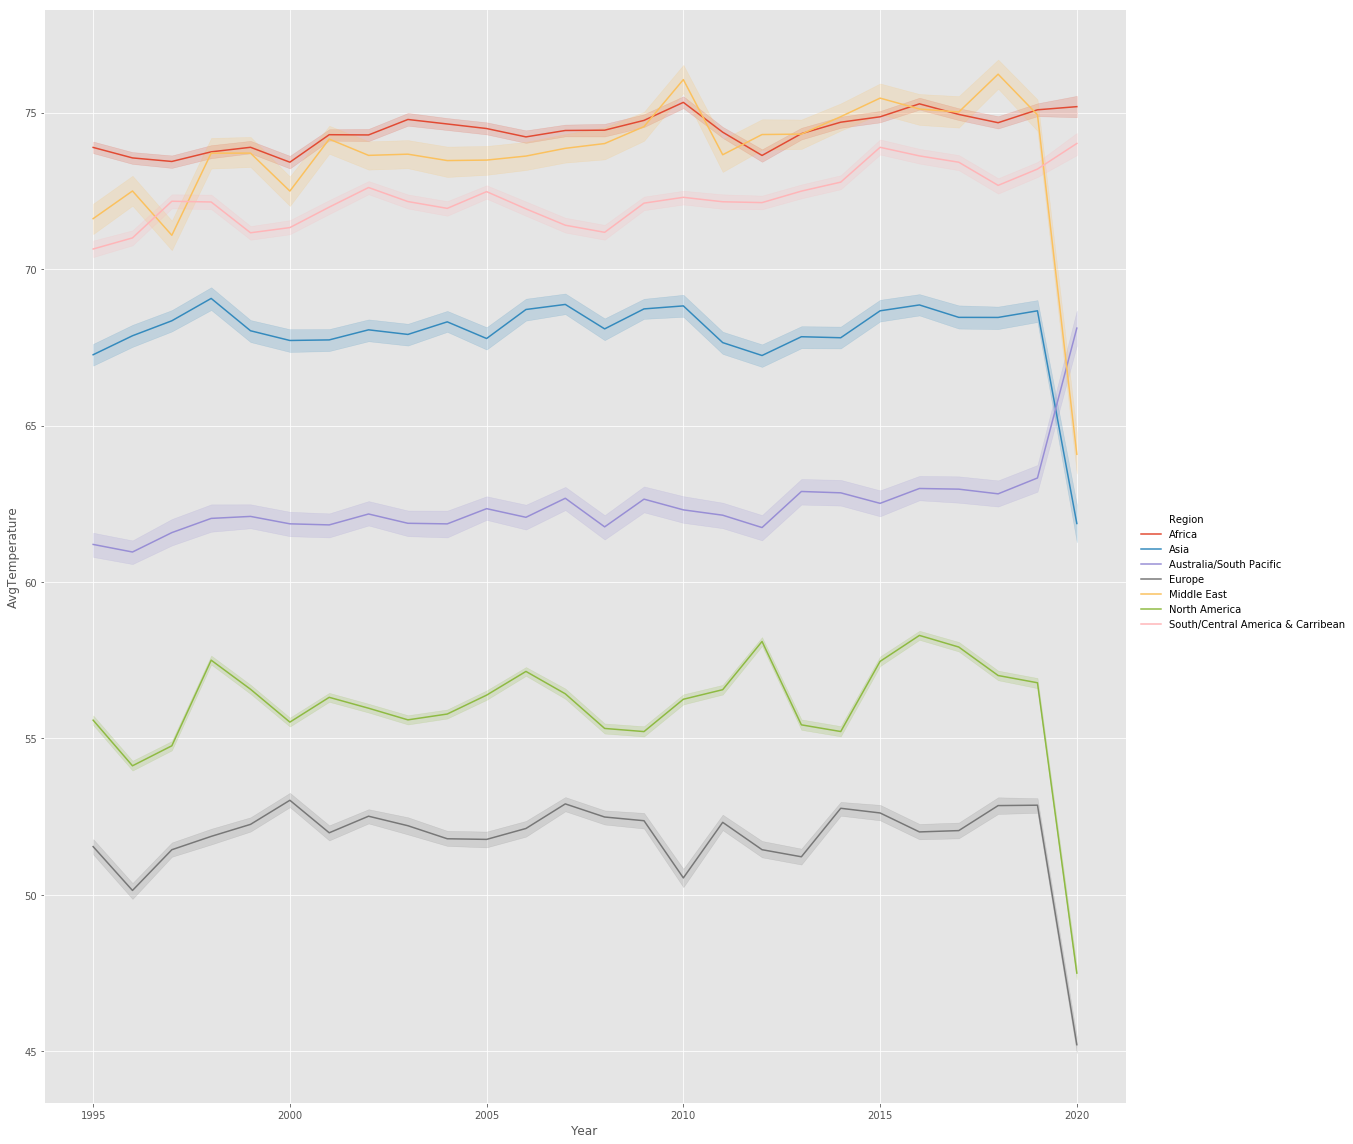

In [60]:
sns.relplot(x='Year',y='AvgTemperature',data=df,kind='line',hue='Region',height=16, aspect=1)

Distribution plots

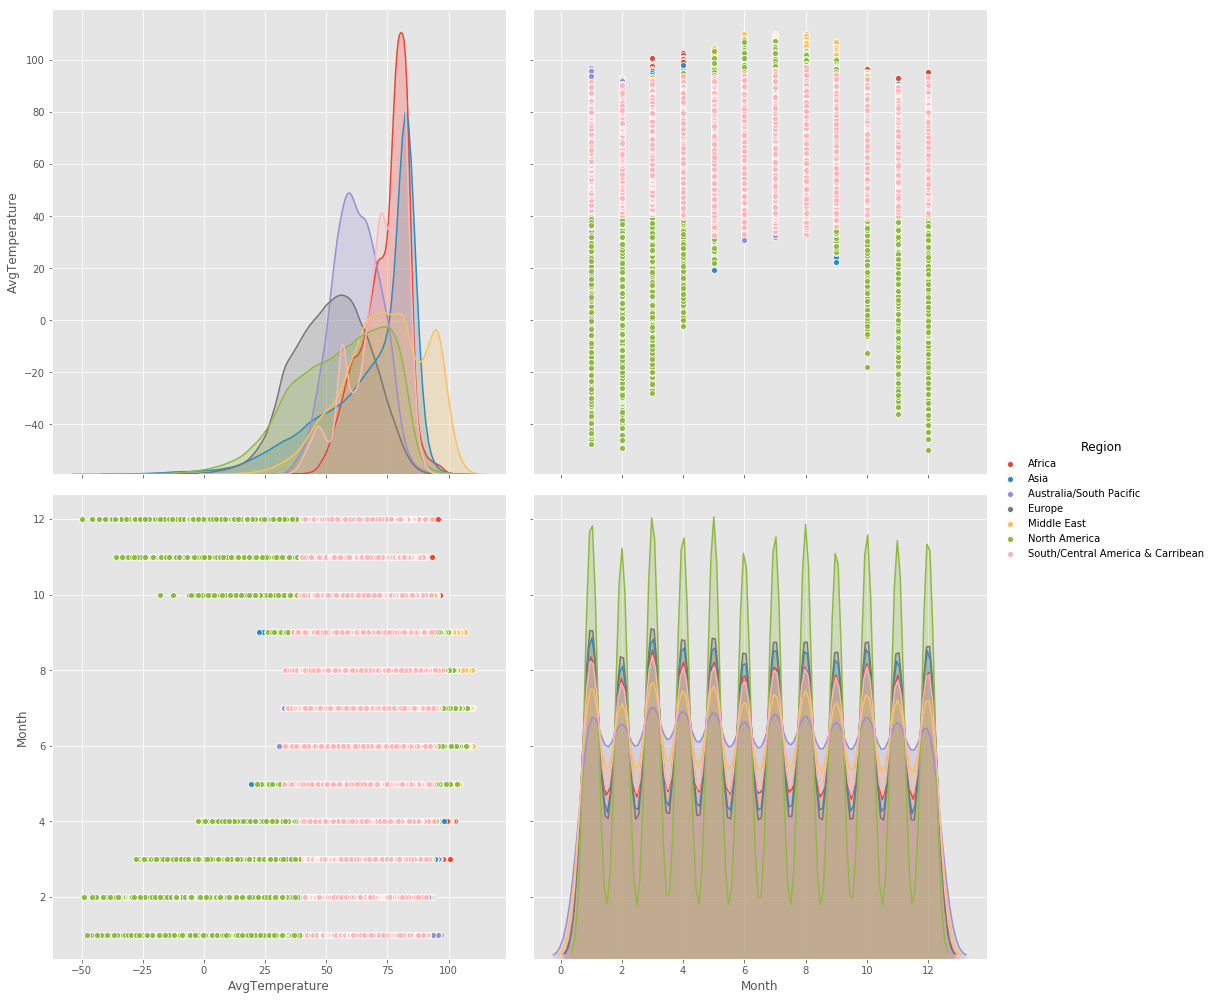

In [61]:
sns.pairplot(data=df[['AvgTemperature','Region','Month']],hue='Region',height=7, aspect=1)